### Наивный байесовский классификатор  
#### Цель работы  
Научиться применять модели наивного байесовского классификатора с использованием библиотеки sklearn для решения задач машинного обучения.  

#### Содержание работы  
Загрузите датасет breast_cancer из библиотеки sklearn.  
Выведите в виде гистограммы распределения непрерывных атрибутов в этом наборе данных.  
Постройте модель наивного байесовского классификатора на первых двух столбцах и оцените ее качество.  
Постройте ту же модель на полном датасете и сравните ее качество с первой.  
Отберите признаки, соответствующие выбранному модельному виду распределения. Постройте модель на выбранных признаках и сравните ее с предыдущей.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
from sklearn import datasets
data = datasets.load_breast_cancer()

In [3]:
X = data.data[:,:2]
y = data.target

In [4]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

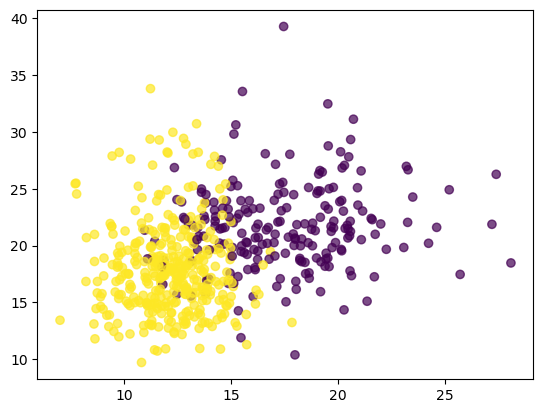

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.7)

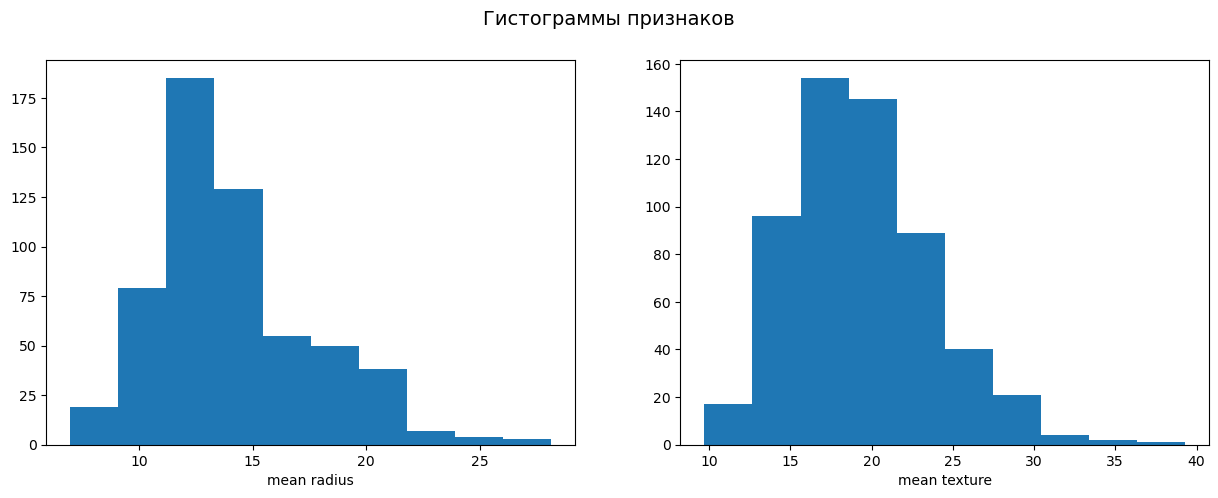

In [9]:
plt.figure(figsize=(15, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [10]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()

In [11]:
gaussian_nb.fit(X, y)

GaussianNB()

C:\Users\Sofia\AppData\Local\Temp\ipykernel_14732\1885452030.py:9: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contourf(xx, yy, Z, c=y, alpha=0.7)


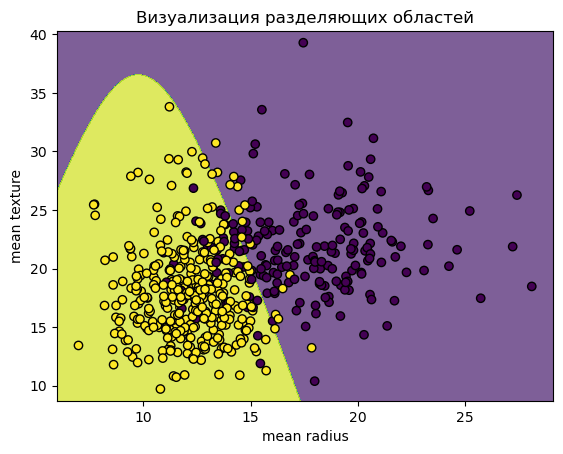

In [23]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = gaussian_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, c=y, alpha=0.7) 
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Визуализация разделяющих областей')
plt.show()

In [24]:
y_pred = gaussian_nb.predict(X)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


In [ ]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [27]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


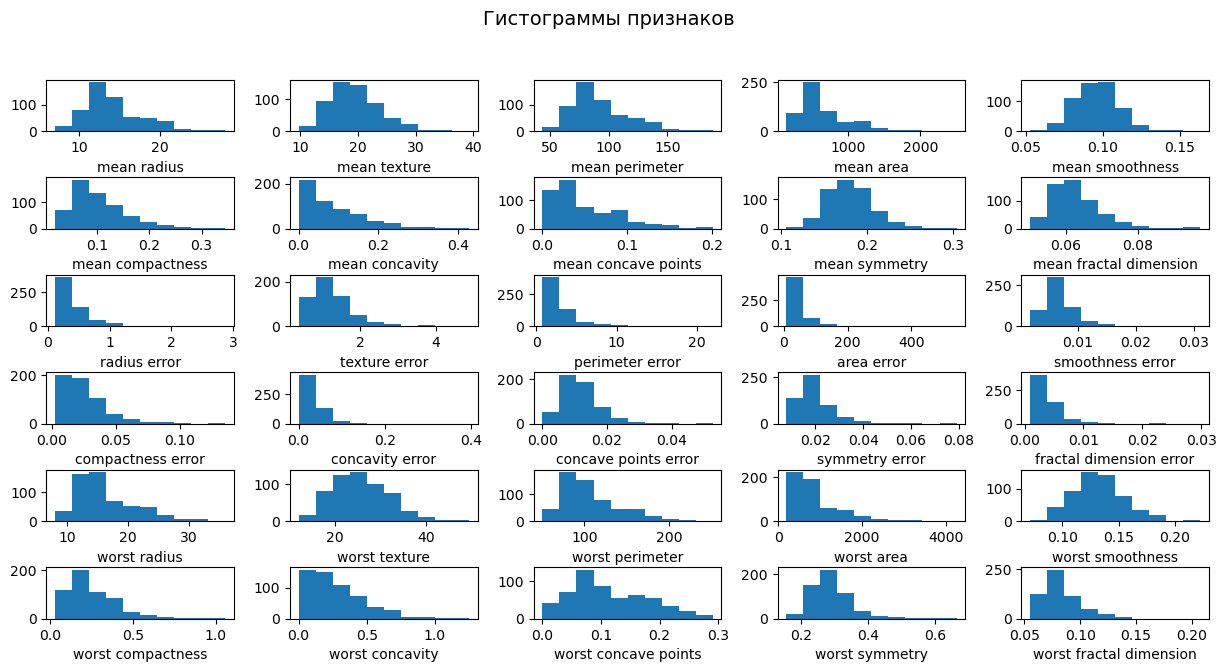

In [28]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [38]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.drop(['mean concavity','radius error', 
              'perimeter error', 'area error', 
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area', 
              'worst concavity'], 
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,concave points error,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.01587,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01340,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02058,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.01867,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01885,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678


In [39]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469
